In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Read Data**

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arshid/iris-flower-dataset")

print("Path to dataset files:", path)
data=pd.read_csv(path+'/IRIS.csv')

Path to dataset files: /root/.cache/kagglehub/datasets/arshid/iris-flower-dataset/versions/1


In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **ETL**

In [7]:
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [8]:
data.duplicated().sum()

3

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data['species'].value_counts()

,count
species,
Iris-versicolor,50
Iris-virginica,49
Iris-setosa,48


# **Data Analysis**

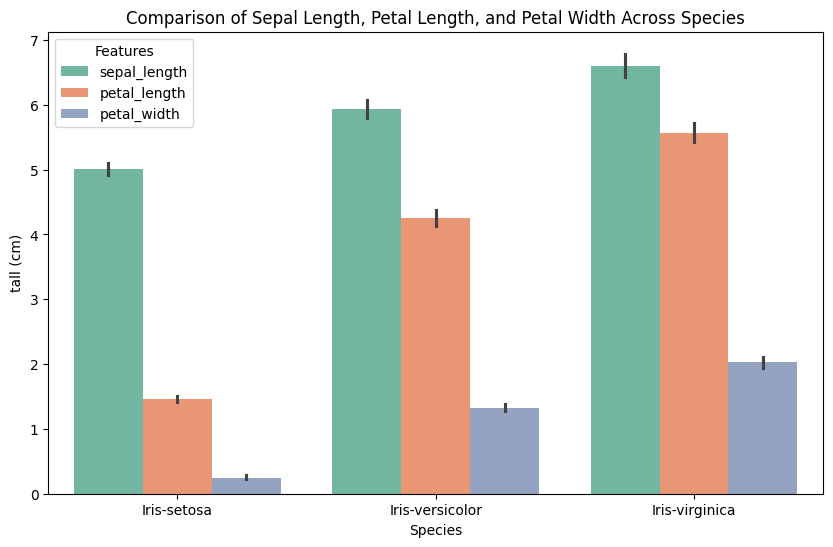

In [12]:
iris_melted = data.melt(id_vars='species', value_vars=['sepal_length', 'petal_length', 'petal_width'],var_name='Iris feature', value_name='tall')
plt.figure(figsize=(10, 6))
sns.barplot(x='species', y='tall', hue='Iris feature', data=iris_melted, palette='Set2')
plt.title('Comparison of Sepal Length, Petal Length, and Petal Width Across Species')
plt.xlabel('Species')
plt.ylabel('tall (cm)')
plt.legend(title='Features')
plt.show()

<Figure size 1000x600 with 0 Axes>

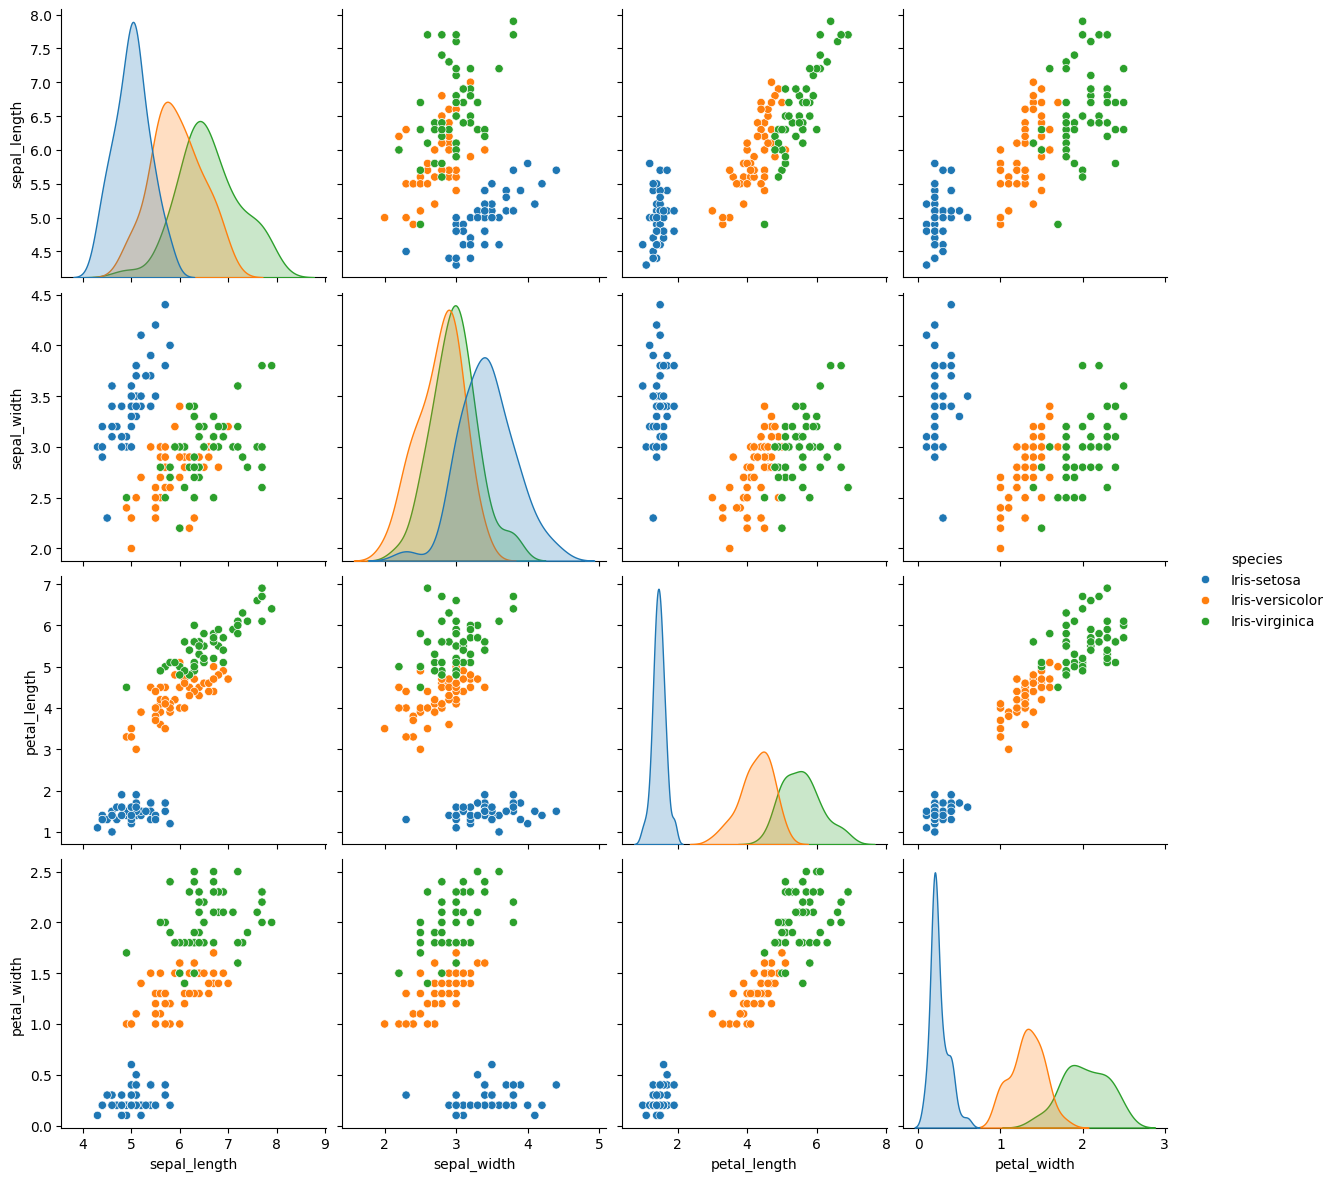

In [15]:
plt.figure(figsize=(10, 6))
sns.pairplot(data,hue="species",size=3);
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['species']=le.fit_transform(data['species'])

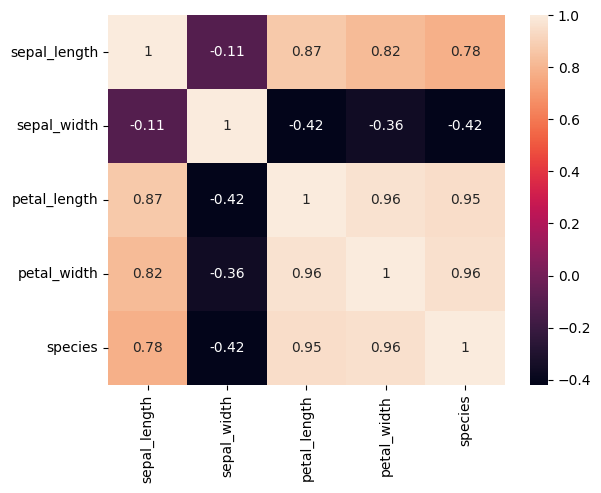

In [43]:
sns.heatmap(data.corr(),annot=True)
plt.show()

# **Data Model**

In [49]:
X=data.drop('species',axis=1)
y=data['species']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [51]:
svc=SVC(class_weight='balanced')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [52]:
print("train accuracy =", svc.score(X_train,y_train))
print("test accuracy =", svc.score(X_test,y_test))

train accuracy = 0.9829059829059829
test accuracy = 0.9666666666666667


In [53]:
print (classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

